# Part 2

Install the necessary libraries for time series and Prediction and import them 

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [3]:
import requests
import pandas as pd

The "coding_challenge.csv" provided in the Github is downloaded for further analysis in Part2 

In [137]:
import requests
import pandas as pd
# Github Url for coding_challenge 
url = 'https://raw.githubusercontent.com/7Learnings/code-challenges/data_science/datascience/coding_challenge.csv'
res = requests.get(url, allow_redirects=True)
with open('coding_challenge.csv','wb') as file:
    file.write(res.content)

In [138]:
# Converting csv to Pandas dataframe 
df_cc = pd.read_csv('coding_challenge.csv')

In [139]:
# Dataframe overview 
df_cc.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [18]:
# Only certain features of station 725300 are considered here 
df_coding_challenge = pd.read_csv('station_725300.csv')

In [19]:
df_coding_challenge.head()

,Unnamed: 0,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [20]:
#There are around 11 stations, but we consider only 1 for our modelling 
df_coding_challenge.shape

(1540, 15)

In [21]:
#Checking unique values of station_number provides us with only 725300 Station  
df_coding_challenge.station_number.unique()

array([725300], dtype=int64)

In [22]:
# Checking datatypes of features 
df_coding_challenge.dtypes

Unnamed: 0                  int64
date                       object
station_number              int64
mean_temp                 float64
mean_dew_point            float64
mean_sealevel_pressure    float64
mean_visibility           float64
mean_wind_speed           float64
max_temperature           float64
total_precipitation       float64
snow_depth                float64
fog                          bool
snow                         bool
hail                         bool
thunder                      bool
dtype: object

In [23]:
# converting fog, snow, hail, thunder from boolean to int 
df_coding_challenge['fog'] = df_coding_challenge['fog'].astype(int)
df_coding_challenge['snow'] = df_coding_challenge['snow'].astype(int)
df_coding_challenge['hail'] = df_coding_challenge['hail'].astype(int)
df_coding_challenge['thunder'] = df_coding_challenge['thunder'].astype(int)

In [29]:
# Converting date which is in obj datatype to date format for time series analysis 
date_time = pd.to_datetime(df_coding_challenge.pop('date'), format='%Y-%m-%d')

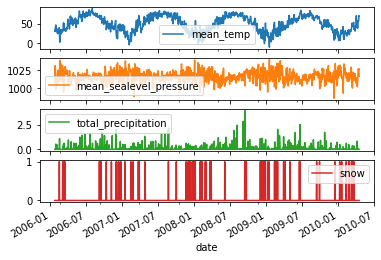

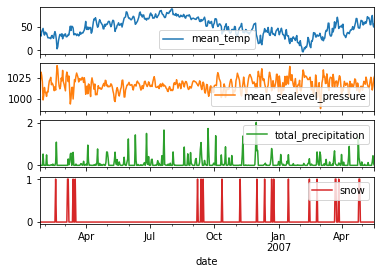

In [30]:
# We see in shape of dataframe that there are 1540 datapoint 
# PLoting certain important features such as mean_temp, precipitation etc. from 2006 to 2010  
plot_cols = ['mean_temp', 'mean_sealevel_pressure', 'total_precipitation', 'snow' ]
plot_features = df_coding_challenge[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df_coding_challenge[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

### On close observation we see that there is no scope of snow from April to September 

In [32]:
# We check mean, standard deviation 25%, 50% etc. for selected features using transpose function 
df_coding_challenge.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station_number,1540.0,725300.000000,0.000000,725300.000000,725300.000000,725300.000000,725300.000000,725300.000000
mean_temp,1540.0,49.644610,19.806252,-9.700000,33.700001,50.799999,67.624998,89.000000
mean_dew_point,1540.0,38.314935,18.535496,-18.900000,24.500000,38.799999,53.825000,73.699997
mean_sealevel_pressure,1540.0,1016.553247,7.116625,985.900024,1012.200012,1016.500000,1021.000000,1039.900024
mean_visibility,1540.0,8.944091,1.687237,1.100000,8.500000,9.800000,10.000000,10.000000
mean_wind_speed,1540.0,8.252727,3.212368,1.400000,5.800000,7.850000,10.100000,20.200001
max_temperature,1540.0,40.058766,18.944874,-18.000000,26.200001,41.000000,56.175001,80.099998
total_precipitation,1540.0,0.117442,0.311098,0.000000,0.000000,0.000000,0.070000,3.910000
snow_depth,1540.0,1.363836,1.754312,0.000000,0.000000,1.200000,2.092500,9.800000
fog,1540.0,0.055195,0.228434,0.000000,0.000000,0.000000,0.000000,1.000000


In [34]:
# creating time stamp 
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

# Creating addition Useful featues for time series data 
df_coding_challenge['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_coding_challenge['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_coding_challenge['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_coding_challenge['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [69]:
df_coding_challenge.head()

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder,Day sin,Day cos,Year sin,Year cos
0,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,0,0,0,0,-0.258819,0.965926,0.389042,0.921220
1,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,0,0,0,0,-0.258819,0.965926,0.404832,0.914391
2,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,0,0,0,0,-0.258819,0.965926,0.420501,0.907292
3,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,0,0,0,0,-0.258819,0.965926,0.436046,0.899924
4,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,0,0,0,0,-0.258819,0.965926,0.451462,0.892290


In [70]:
# check total leangth of the dataframe which is around 1540 datapoint and creating train, test, validation split 
n = len(df_coding_challenge)
train_df = df_coding_challenge[0:int(n*0.7)]
val_df = df_coding_challenge[int(n*0.7):int(n*0.9)]
test_df = df_coding_challenge[int(n*0.9):]

In [71]:
# Training data shape
train_df.shape

(1078, 17)

In [99]:
train_df.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder,Day sin,Day cos,Year sin,Year cos
0,-0.900512,-0.678980,-1.146550,-1.207875,2.136430,-0.970842,-0.373877,0.000342,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.550884,1.330431
1,-0.895495,-0.967385,0.667995,0.630455,1.761414,-0.660567,-0.373877,0.000342,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.573071,1.320719
2,-1.046009,-1.058179,2.151323,0.569177,-1.176218,-1.160162,-0.373877,0.945065,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.595090,1.310621
3,-0.564363,-0.759092,1.604071,0.630455,0.730117,-0.308221,-0.373877,0.945065,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.616935,1.300142
4,-0.398798,-0.305121,0.495187,0.262789,-0.551190,-0.334516,-0.373877,0.945065,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.638597,1.289284


In [73]:
# Validation data shape 
val_df.shape

(308, 17)

In [100]:
val_df.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder,Day sin,Day cos,Year sin,Year cos
1078,-1.171438,-0.796478,0.250366,-4.455591,0.511358,-1.549320,0.611474,4.335715,4.310771,4.310771,4.310771,4.310771,1.215232,1.215232,0.232843,1.423529
1079,-1.622980,-1.421356,0.595989,-0.166155,-0.707447,-1.538803,0.488305,4.335715,-0.231762,-0.231762,-0.231762,-0.231762,1.215232,1.215232,0.256659,1.419340
1080,-1.693220,-1.432037,0.538389,-2.249595,-0.769950,-2.022621,-0.373877,4.335715,4.310771,4.310771,4.310771,4.310771,1.215232,1.215232,0.280401,1.414737
1081,-1.698237,-1.549536,0.293567,-1.759374,1.011380,-2.022621,-0.065955,4.335715,4.310771,4.310771,4.310771,4.310771,1.215232,1.215232,0.304061,1.409722
1082,-2.235072,-2.099641,0.711205,-2.004484,-0.332430,-2.201423,-0.189124,5.112200,4.310771,4.310771,4.310771,4.310771,1.215232,1.215232,0.327633,1.404295


In [75]:
#Test data shape 
test_df.shape

(154, 17)

In [76]:
num_features = df_coding_challenge.shape[1]

In [77]:
# Including 14 features shortlisting in given csv + Day sin 	Day cos 	Year sin 	Year cos has created 17 total features 
print(num_features)

17


In [91]:
# Data Normalization  
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

##  Window Generator is an important process of prediction 
For example, to make a single prediction 24h into the future, given 24h of history you might define a window like this:
 
Input width = 24
 
Offset = 24  

Label width = 1 


Total Width is 48 
    


In [98]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

          # Slicing doesn't preserve static shape information, so set the shapes
          # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

In [111]:
# Checking for single step Model  
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['snow'])
single_step_window

In [112]:
from tensorflow import keras

In [113]:
column_indices = {name: i for i, name in enumerate(df_coding_challenge.columns)}

In [114]:
# print features 
print(column_indices)

{'station_number': 0, 'mean_temp': 1, 'mean_dew_point': 2, 'mean_sealevel_pressure': 3, 'mean_visibility': 4, 'mean_wind_speed': 5, 'max_temperature': 6, 'total_precipitation': 7, 'snow_depth': 8, 'fog': 9, 'snow': 10, 'hail': 11, 'thunder': 12, 'Day sin': 13, 'Day cos': 14, 'Year sin': 15, 'Year cos': 16}


In [105]:
# creating baseline 
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [115]:
baseline = Baseline(label_index=column_indices['snow'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
#performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)
print(val_performance)

10/10 [==============================] - 0s 2ms/step - loss: 1.5633 - mean_absolute_error: 0.3441
{'Baseline': [1.680342435836792, 0.36991310119628906]}


In [116]:
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])

In [117]:
MAX_EPOCHS = 20

In [118]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [119]:
#Dense Model 
history = compile_and_fit(dense, single_step_window)

Epoch 1/20
34/34 [==============================] - 1s 14ms/step - loss: 1.0588 - mean_absolute_error: 0.4925 - val_loss: 1.0128 - val_mean_absolute_error: 0.4356
Epoch 2/20
34/34 [==============================] - 0s 6ms/step - loss: 0.9213 - mean_absolute_error: 0.4257 - val_loss: 1.0047 - val_mean_absolute_error: 0.4476
Epoch 3/20
34/34 [==============================] - 0s 6ms/step - loss: 0.9158 - mean_absolute_error: 0.4403 - val_loss: 1.0243 - val_mean_absolute_error: 0.5063
Epoch 4/20
34/34 [==============================] - 0s 6ms/step - loss: 0.8222 - mean_absolute_error: 0.4150 - val_loss: 1.0341 - val_mean_absolute_error: 0.4799


In [120]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,train_df = train_df,  val_df=val_df, test_df=test_df,
    label_columns = ['snow'])

In [121]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [122]:
# CNN model 
history = compile_and_fit(conv_model, conv_window)

Epoch 1/20
34/34 [==============================] - 1s 11ms/step - loss: 1.4273 - mean_absolute_error: 0.5100 - val_loss: 0.9335 - val_mean_absolute_error: 0.4239
Epoch 2/20
34/34 [==============================] - 0s 6ms/step - loss: 1.0656 - mean_absolute_error: 0.5014 - val_loss: 0.9153 - val_mean_absolute_error: 0.3766
Epoch 3/20
34/34 [==============================] - 0s 7ms/step - loss: 0.9960 - mean_absolute_error: 0.4407 - val_loss: 0.9102 - val_mean_absolute_error: 0.4000
Epoch 4/20
34/34 [==============================] - 0s 7ms/step - loss: 0.9698 - mean_absolute_error: 0.4436 - val_loss: 0.8983 - val_mean_absolute_error: 0.4069
Epoch 5/20
34/34 [==============================] - 0s 6ms/step - loss: 0.8906 - mean_absolute_error: 0.4164 - val_loss: 0.9065 - val_mean_absolute_error: 0.4135
Epoch 6/20
34/34 [==============================] - 0s 6ms/step - loss: 0.9724 - mean_absolute_error: 0.4437 - val_loss: 0.9062 - val_mean_absolute_error: 0.3973


In [123]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [129]:
wide_window = WindowGenerator(
    input_width=24,
    label_width=24,
    shift=1,train_df = train_df,  val_df=val_df, test_df=test_df,
    label_columns=['snow'])

In [136]:
# RNN model 
history = compile_and_fit(lstm_model, wide_window)

Epoch 1/20
33/33 [==============================] - 3s 33ms/step - loss: 0.8445 - mean_absolute_error: 0.4134 - val_loss: 0.9713 - val_mean_absolute_error: 0.4154
Epoch 2/20
33/33 [==============================] - 0s 14ms/step - loss: 0.7783 - mean_absolute_error: 0.3976 - val_loss: 1.0044 - val_mean_absolute_error: 0.4307
Epoch 3/20
33/33 [==============================] - 1s 14ms/step - loss: 0.7484 - mean_absolute_error: 0.3924 - val_loss: 1.0491 - val_mean_absolute_error: 0.4748


## Challenges 
1. Being new to GCP and BigQuery sometime was spend in understanding the open datasets available in GCP, creating service account and keys, using it to access the data through querying from python notebook 
2. Limited understanding of weather data, only little time was spend in understanding the data, how the various features in the dataset affect the prediction variable "SNOW". 
3. Baseline performing than Dense, CNN, RNN models. 

## Future Work 
1. Understanding features better in Part 1, out of around 31 features finding its correlation with snow, and selecting the ones which are strongly positively or strongly negatively related to snow fall. 
2. Here only single step model is used to modelling, however, for station 725300, the data was provided from 24-01-2006 to ending 16-04-2010. The prediction was asked for 16.02.2010, therefore the correct input width, offset and label width needs to be set in order to see what is the predicted value and compare it with the actual data to see if the prediction was correct or not. 
3. The Question asks for stations between 725300 and 726300 but we have only selected 725300. This can be considered going in future. 
4. Analysis needs to be done about improving models other than Baseline to see how to make it perform better on the data. 